   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

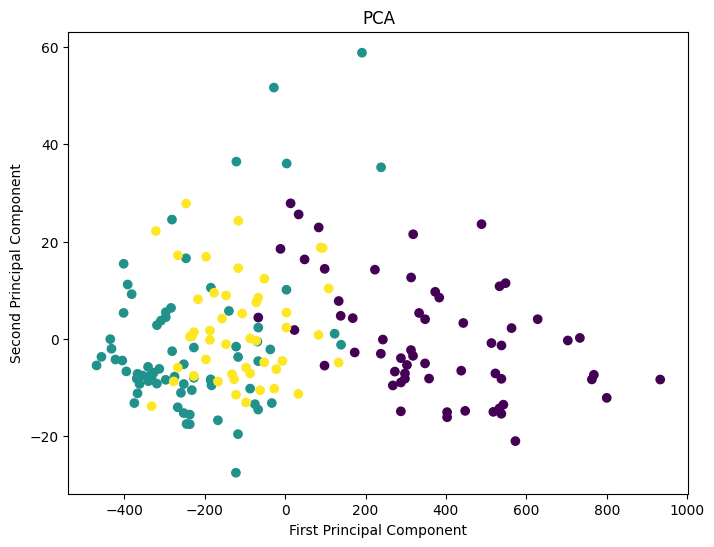

Accuracy: 0.9722222222222222
Classification Report:               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


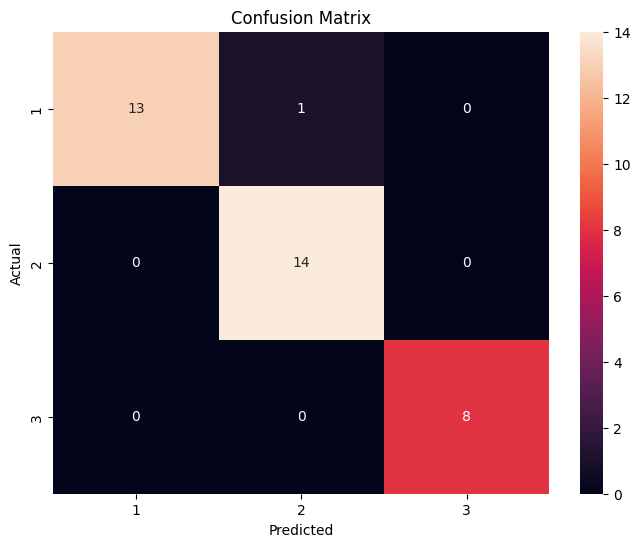

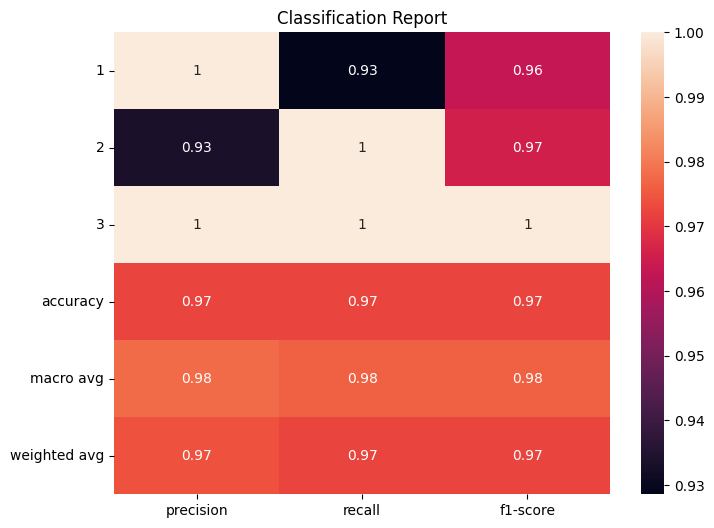

['model.pkl']

In [3]:
#Perform EDA on wine dataset. Use PCA to reduce principal components from it. Finally perform classification using logistic regression to find accuracy and classification report for the model built.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

#Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

#Perform EDA
print(data.head())
print(data.describe())
print(data.info())
print(data.isnull().sum())

#Perform PCA
X = data.drop('Class', axis=1)
y = data['Class']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca)

#Plot the PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA')
plt.show()

#Perform classification using logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

#Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Plot the classification report
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()


joblib.dump(log_reg, 'model.pkl')

In [4]:
%%writefile app.py 
import streamlit as st
import pandas as pd
import numpy as np
import joblib

model = joblib.load('model.pkl')
def main():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
    data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
    st.title('Wine Classification')
    st.write('This is a wine classification web app')
    st.write('Please enter the required fields')
    alcohol = st.slider('Alcohol', float(data['Alcohol'].min()), float(data['Alcohol'].max()))
    malic_acid = st.slider('Malic acid', float(data['Malic acid'].min()), float(data['Malic acid'].max()))
    ash = st.slider('Ash', float(data['Ash'].min()), float(data['Ash'].max()))
    alcalinity_of_ash = st.slider('Alcalinity of ash', float(data['Alcalinity of ash'].min()), float(data['Alcalinity of ash'].max()))
    magnesium = st.slider('Magnesium', float(data['Magnesium'].min()), float(data['Magnesium'].max()))
    total_phenols = st.slider('Total phenols', float(data['Total phenols'].min()), float(data['Total phenols'].max()))
    flavanoids = st.slider('Flavanoids', float(data['Flavanoids'].min()), float(data['Flavanoids'].max()))
    nonflavanoid_phenols = st.slider('Nonflavanoid phenols', float(data['Nonflavanoid phenols'].min()), float(data['Nonflavanoid phenols'].max()))
    proanthocyanins = st.slider('Proanthocyanins', float(data['Proanthocyanins'].min()), float(data['Proanthocyanins'].max()))
    color_intensity = st.slider('Color intensity', float(data['Color intensity'].min()), float(data['Color intensity'].max()))
    hue = st.slider('Hue', float(data['Hue'].min()), float(data['Hue'].max()))
    od280_od315_of_diluted_wines = st.slider('OD280/OD315 of diluted wines', float(data['OD280/OD315 of diluted wines'].min()), float(data['OD280/OD315 of diluted wines'].max()))
    proline = st.slider('Proline', float(data['Proline'].min()), float(data['Proline'].max()))

    input_data = {'Alcohol': alcohol, 'Malic acid': malic_acid, 'Ash': ash, 'Alcalinity of ash': alcalinity_of_ash, 'Magnesium': magnesium, 'Total phenols': total_phenols, 'Flavanoids': flavanoids, 'Nonflavanoid phenols': nonflavanoid_phenols, 'Proanthocyanins': proanthocyanins, 'Color intensity': color_intensity, 'Hue': hue, 'OD280/OD315 of diluted wines': od280_od315_of_diluted_wines, 'Proline': proline}
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)
    st.write('Prediction:', prediction)
    st.write('Prediction Probability:', prediction_proba)

if __name__ == '__main__':
    main()


Overwriting app.py
